# Newton & Quasi-Newton Methods
---

Tom Curran

OSM Bootcamp 2018

July 31, 2018

---

In [55]:
import pandas as pd
import numpy as np
from scipy import optimize as opt
from numpy.linalg import solve, norm
import time
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1.** 

In [59]:
def newton(Df, D2f, x0, maxiter = 1000, tol = 1e-5):
    converge = False
    iter = 0
    x = x0
    error = tol+1

    while iter < maxiter and error > tol:
        
        df_x = Df(x)
        d2f_x = D2f(x)
        
        z_k = solve(d2f_x,df_x)
        
        a = x - z_k
        
        error = norm(df_x, np.inf)
        iter += 1
        
        x = a
        
    if iter < maxiter:
        converge = True
    
    return(x, converge, iter)        

In [84]:
f = opt.rosen # The Rosenbrock function.
df = opt.rosen_der # The first derivative.
v = opt.rosen_hess # The second derivative (Hessian).
opt.fmin_bfgs(f=f, x0=[-2,2], fprime=df, maxiter=50)[0]

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42


1.0000002131864645

In [61]:
newton(df, d2f, x0=np.array([-2, 2]), maxiter = 50)

(array([1., 1.]), True, 6)

*** 

** Problem 2**

In [39]:
def bfgs(df, x0, maxiter, tol = 1e-5):
    
    converge = False
    iter = 0
    x = x0
    error = tol+1
    
    while iter < maxiter and error > tol:
        
        
    

SyntaxError: unexpected EOF while parsing (<ipython-input-39-59b4b8b66b25>, line 9)

***

** Problem 3 **

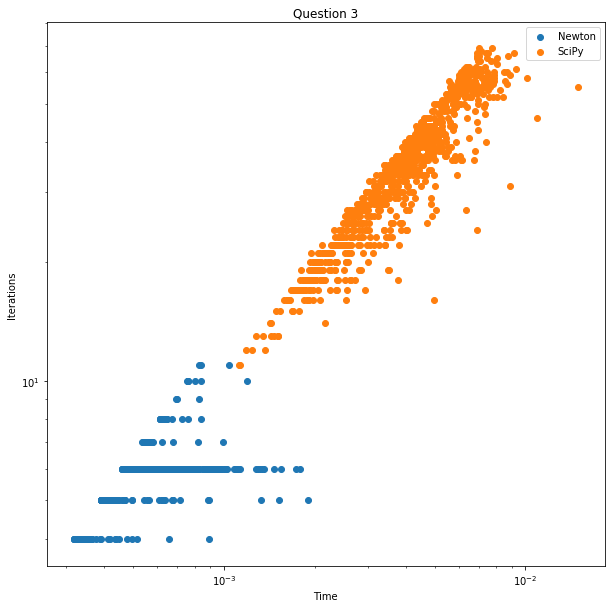

In [118]:
def q3(N):
    
    q1 = np.zeros(N)
    sp = np.zeros(N)
    
    q1i = np.zeros(N)
    spi = np.zeros(N)
    
    for i in range(0, N):
        x0 = np.random.uniform(low = -3,high = 3,size = 2)
        #print(x0)
        start = time.time()
        
        newton_x, newton_converge, newton_iter = newton(opt.rosen_der, opt.rosen_hess, x0)
        q1[i] = time.time() - start
        q1i[i] = newton_iter
        
        start2 = time.time()
        sp_out = opt.fmin_bfgs(opt.rosen, x0, fprime=opt.rosen_der, disp=False, retall=1)
        sp[i] = time.time() - start2
        spi[i] = len(sp_out[1])
    
    plt.figure(figsize = (10,10))
    plt.loglog()
    plt.scatter(q1, q1i, label = "Newton")
    plt.scatter(sp,spi, label = "SciPy")
    plt.ylabel("Iterations")
    plt.xlabel("Time")
    plt.title("Question 3")
    plt.legend()
q3(1000)